In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
from collections import Counter 
import json

import numpy as np

%cd '/content/drive/My Drive/Colab Notebooks/media-agenda/'
from util import DocType, Polarity, Source, OptimalKClustersConfig
from radarfactory import radar_factory, show_simple_radar_chart

%pwd
# from timeseriesplot import get_sentences_counts, get_simple_timeseries_plot

/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda


'/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda'

In [47]:
path = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/sentence_cluster_sentiment_dict.json'

with open(path, 'r') as f:
  assignments = json.load(f)

print('Loaded total {} cluster-sentiment assignments'.format(len(assignments)))
print('Example of an assignment object')
assignments[0]

Loaded total 328091 cluster-sentiment assignments
Example of an assignment object


{'article_id': 0,
 'cluster': 1,
 'comment_id': -1,
 'posting_time': '2005-11-01 00:00:00',
 'sentence_id': 0,
 'sentiw_sentiment': 0.125,
 'source': 'nytimes',
 'textblob_polarity': -0.017045454545454548,
 'textblob_subjectivity': 0.5181818181818182}

In [48]:
def get_average_cluster_distribution_in_percentage(assignments: dict, with_garbage_clusters = False):
  if not with_garbage_clusters:
    assignments = [a for a in assignments if a['cluster'] not in OptimalKClustersConfig.garbage_clusters]

  grouped_assignments = []
  grouped_assignments.append([a for a in assignments if a['source'] == Source.NYTIMES and a['comment_id'] == DocType.NON_COMMENT.value])
  grouped_assignments.append([a for a in assignments if a['source'] == Source.NYTIMES and a['comment_id'] != DocType.NON_COMMENT.value])
  grouped_assignments.append([a for a in assignments if a['source'] == Source.QUORA and a['comment_id'] == DocType.NON_COMMENT.value])
  grouped_assignments.append([a for a in assignments if a['source'] == Source.QUORA and a['comment_id'] != DocType.NON_COMMENT.value])
  grouped_assignments.append([a for a in assignments if a['source'] == Source.SPIEGEL and a['comment_id'] == DocType.NON_COMMENT.value])
  grouped_assignments.append([a for a in assignments if a['source'] == Source.SPIEGEL and a['comment_id'] != DocType.NON_COMMENT.value])

  totals = []
  distribution = []
  for ga in grouped_assignments:
    total = len(ga)
    totals.append(total)

    tuples = []
    for a in ga:
      tuples.append((a['cluster']))

    tuples = sorted(tuples, key = lambda item: item)
    counts = Counter(tuples, )

    array = np.zeros((OptimalKClustersConfig.k_with_garbage))
    for item, count in counts.items():
      array[item] = count / total * 100

    # print(array)
    distribution.append(array)
  
  distribution = np.array(distribution)
  if not with_garbage_clusters:
    distribution = np.delete(distribution, OptimalKClustersConfig.garbage_clusters, axis = 1)
  return totals, distribution

In [49]:
title = 'Topic Distribution per Source and Document Type (%)'
colors = ['purple', 'plum', 'green', 'yellowgreen', 'navy', 'skyblue']
labels = ('New York Times - article', 'New York Times - comment', 'Quora - article', 'Quora - comment', 'Der Spiegel - article', 'Der Spiegel - comment')
totals, data = get_average_cluster_distribution_in_percentage(assignments)

for i in range(len(labels)):
  print('{}: total {} sentences'.format(labels[i], totals[i]))
print()

# fig, plt = show_simple_radar_chart(OptimalKClustersConfig.clusters, data, colors, labels, title)
# show_simple_radar_chart(OptimalKClustersConfig.clusters, data[0:2], colors[0:2], labels[0:2], 'Topic distribution on organic food in New York Times (%)')
# show_simple_radar_chart(OptimalKClustersConfig.clusters, data[2:4], colors[2:4], labels[2:4], 'Topic distribution on organic food in Quora (%)')
# show_simple_radar_chart(OptimalKClustersConfig.clusters, data[4:6], colors[4:6], labels[4:6], 'Topic distribution on organic food in Der Spiegel (%)')
# show_simple_radar_chart(OptimalKClustersConfig.clusters, data[[0, 3, 4], :], [colors[0], colors[3], colors[4]], [labels[0], labels[3], labels[4]], 'Topic Distribution on Organic Food for Online News and Discussion Forum (%)')

TypeError: ignored

In [40]:
# sorted(OptimalKClustersConfig.clusters_with_garbage_nonum)
OptimalKClustersConfig.clusters_with_garbage

sortedIndex = [11, 13, 0, 12, 5, 6, 3, 8, 10, 7, 1, 2, 4, 9, 14]

# [OptimalKClustersConfig.clusters_with_garbage[i] for i in sortedIndex]
[data[j][i] for j in range(6) for i in sortedIndex[:12]]

IndexError: ignored

In [36]:
# OptimalKClustersConfig.clusters.sort
totals, data = get_average_cluster_distribution_in_percentage(assignments, with_garbage_clusters = True)
data

TypeError: ignored

/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/plot


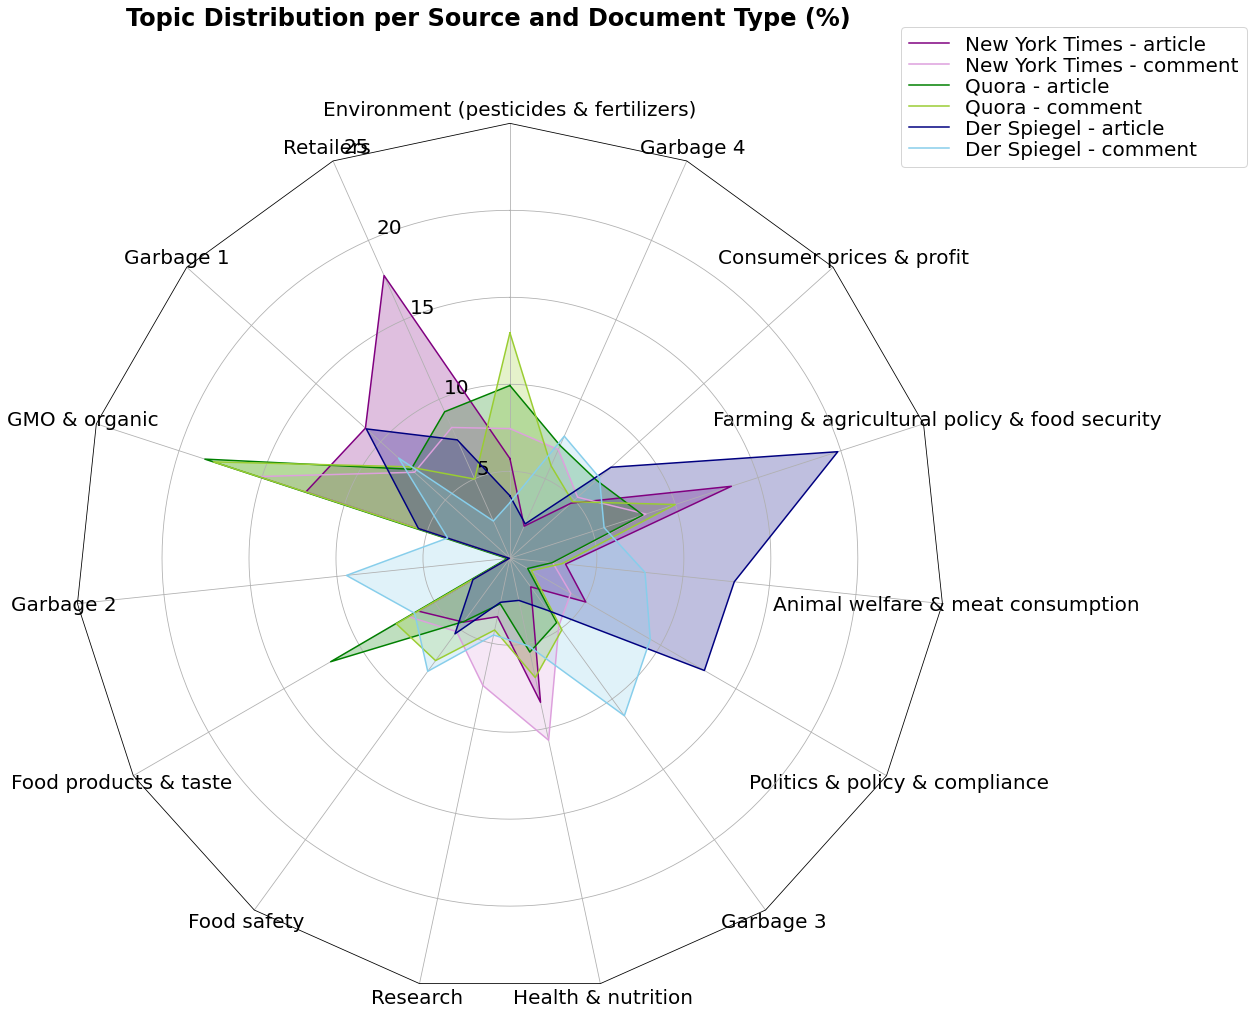

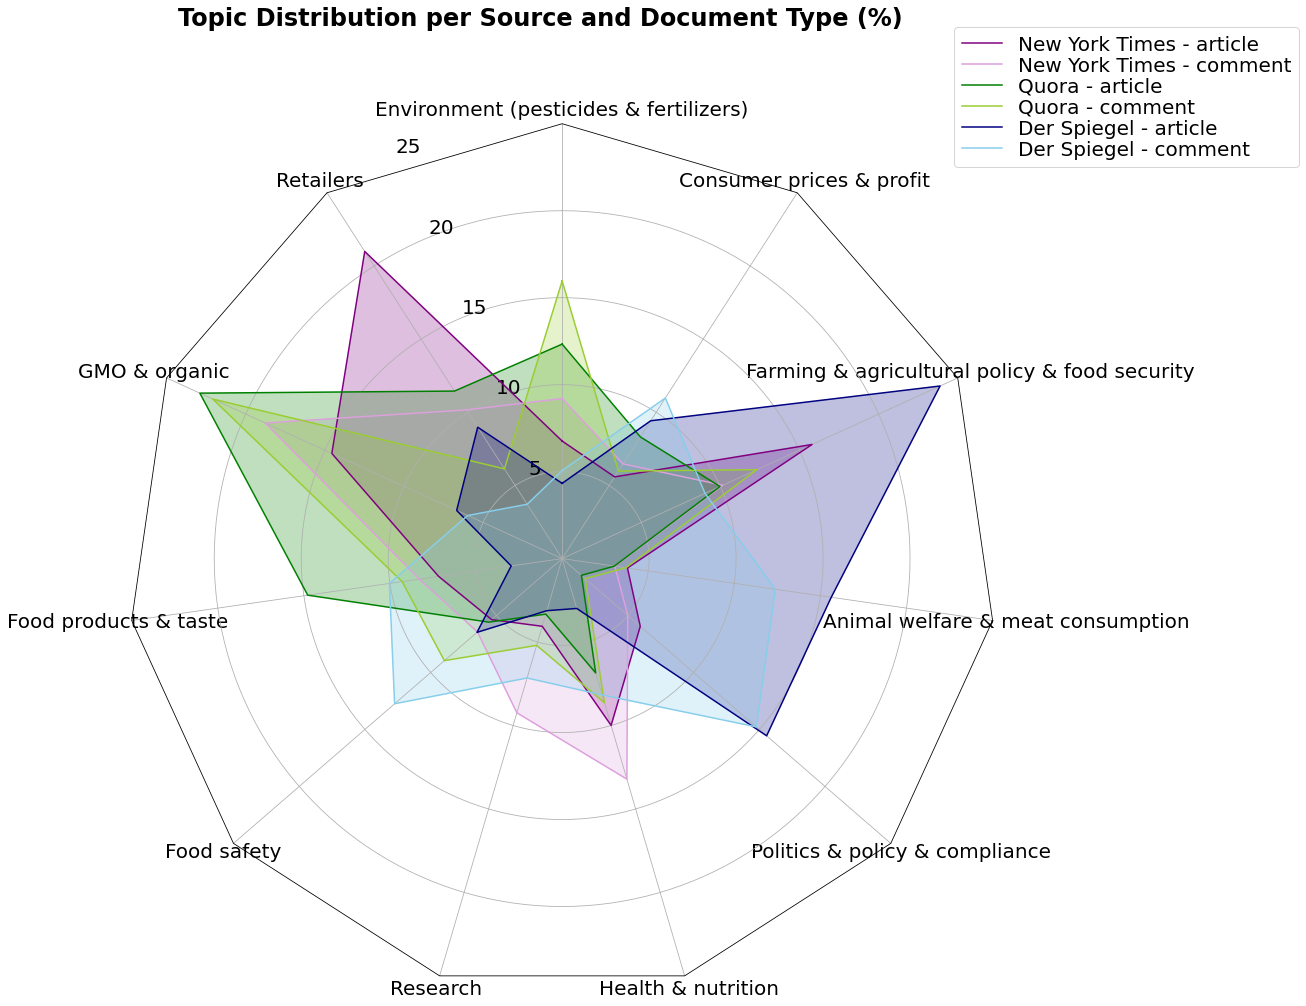

In [ ]:
def show_simple_radar_chart(clusters, data, colors, labels, title, ymax = 25, ymin = 0, save_to = None):
  k = len(clusters)
  theta = radar_factory(k, frame = 'polygon')
  fig, axes = plt.subplots(figsize = (24, 16), subplot_kw = dict(projection = 'radar'))

  for d, color in zip(data, colors):
    axes.plot(theta, d, color = color)
    axes.fill(theta, d, facecolor = color, alpha = 0.25)

  axes.set_ylim(ymin, ymax)
  axes.set_varlabels(clusters)
  legend = axes.legend(labels, loc = (.95, .95), labelspacing = 0.1)
#   legend = axes.legend(labels, loc = (.95, .95), labelspacing = 0.1, fontsize = 'small')
  fig.text(0.5, 0.965, title, horizontalalignment = 'center', color = 'black', weight = 'bold', size = 'large')
  plt.show()

  if save_to is not None:
   fig.savefig(save_to, format = 'pdf', dpi=1200)

  return fig, plt

%cd '/content/drive/My Drive/Colab Notebooks/media-agenda/plot'
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
totals, data = get_average_cluster_distribution_in_percentage(assignments, with_garbage_clusters = True)
fig, plt = show_simple_radar_chart(OptimalKClustersConfig.clusters_with_garbage, data, colors, labels, title, save_to = 'topic_dist_radar_with_garbage.pdf')

totals, data = get_average_cluster_distribution_in_percentage(assignments, with_garbage_clusters = False)
fig, plt = show_simple_radar_chart(OptimalKClustersConfig.clusters, data, colors, labels, title, save_to = 'topic_dist_radar.pdf')